<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_0607_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%9A%8C%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

_file = files.upload()

Saving images.png to images.png


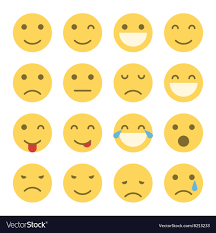

In [2]:
img = cv2.imread("images.png")
height, width, channel = img.shape
cv2_imshow(img)

#### 1. 상하대칭

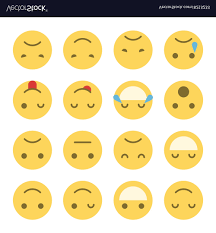

In [ ]:
turn_y = np.zeros(shape=(height, width, channel), dtype=np.uint8)

for y in range(height):
  y1 = (height-1)-y
  turn_y[y] = img[y1]

cv2_imshow(turn_y)

#### 2.좌우대칭

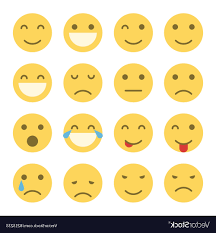

In [ ]:
turn_x = np.zeros(shape=(height, width, channel), dtype=np.uint8)

for y in range(height):
  for x in range(width):
    x1 = (width-1) - x
    turn_x[y][x]=img[y][x1]

cv2_imshow(turn_x)

#### 3. 시계방향 90도 회전

In [ ]:
def turn_img(_img):
  _height, _width, _channel = _img.shape
  turn_img = np.zeros(shape=(_width, _height, _channel), dtype="uint8")

  for y in range(_height):
    y1 = (_height-1)-y
    for x in range(_width):
      turn_img[x][y] = _img[y1][x]

  return turn_img

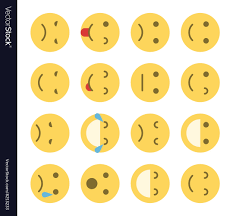

In [ ]:
turn_90 = turn_img(img)
cv2_imshow(turn_90)

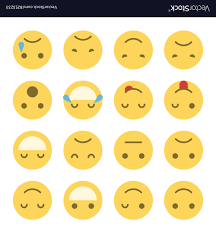

In [ ]:
turn_180 =turn_img(turn_90)
cv2_imshow(turn_180)

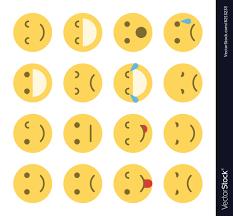

In [ ]:
turn_270 =turn_img(turn_180)
cv2_imshow(turn_270)

#### 4. 임의의 각도로 회전

In [ ]:
def rotate_img(_img, _degree):
  height, width, channel = _img.shape
  _radian = np.radians(_degree)

  r_img = np.zeros(shape=_img.shape, dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      r_x = int((x-width/2)*np.cos(_radian) - (y-height/2)*np.sin(_radian) + (x-width/2))
      r_y = int((x-width/2)*np.sin(_radian) + (y-height/2)*np.cos(_radian) + (y-height/2))

      if 0 <= r_y < height:
        if 0 <= r_x < width:
          r_img[r_y][r_x] = img[y][x]
  
  return r_img


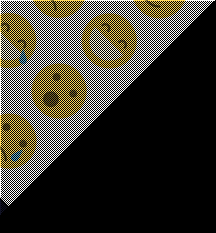

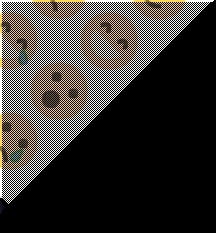

In [ ]:
r_img = rotate_img(img, 90)
cv2_imshow(r_img)
r_img = cv2.medianBlur(r_img, 3)
cv2_imshow(r_img)

#### 5. 필터 적용

In [ ]:
def blur_img(_img, level_y, level_x):
  height, width, channel = _img.shape
  b_img = np.zeros(shape=_img.shape, dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      count = 0
      sum = [0, 0, 0]
      for f_y in range(y-level_y//2, y+level_y//2+1):
        if f_y < 0 or f_y > height-1 :
          continue
        for f_x in range(x-level_x//2, x+level_x//2+1):
          if f_x < 0 or f_x > width - 1:
            continue
          
          sum += _img[f_y][f_x][:]
          count += 1
        
      b_img[y][x][:] = [int(i/count) for i in sum]

  return b_img

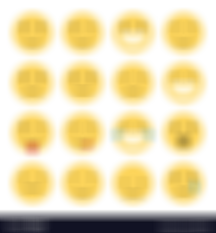

In [ ]:
b_img = blur_img(img, 12, 12)
cv2_imshow(b_img)

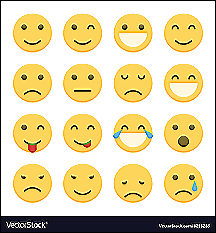

In [13]:
_h, _w = img.shape[:2]
temp_img = img.astype(np.int32)
_sharpen = np.zeros(shape=img.shape, dtype='int32')
for y in range(_h):
  y_ = y-1
  _y = y+1
  if y_ < 0 or _y >= _h:
    continue
  for x in range(_w):
    x_ = x-1
    _x = x+1
    if x_ < 0 or _x >= _w:
      continue       
    _sharpen[y, x][:] = (temp_img[y, x][:]*5 - temp_img[_y, x][:] - temp_img[y, x_][:] - temp_img[y, _x][:] - temp_img[_y, x][:])
_sharpen = _sharpen.clip(0, 255)
_sharpen = _sharpen.astype(np.uint8)
cv2_imshow(_sharpen)